In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\Programming\Machine Learning\Data Preprocessing\employees.csv")
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [3]:
df.shape

(1000, 8)

In [4]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [14]:
# Changing Dtype from Object to Datetime
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [7]:
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

In [16]:
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [9]:
df['Gender'].fillna('No Gender', inplace=True)

In [12]:
mode = df['Senior Management'].mode().values[0]
df['Senior Management'] = df['Senior Management'].replace(np.nan, mode)
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [17]:
df = df.dropna(axis=0, how='any')

In [18]:
df.isnull().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [19]:
df.shape

(899, 8)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [38]:
df.loc[:, 'Gender'] = le.fit_transform(df['Gender'])

HISTOGRAM CAN BE USED FOR UNI AND BIVARIATE ANALYSIS

<Axes: xlabel='Salary', ylabel='Count'>

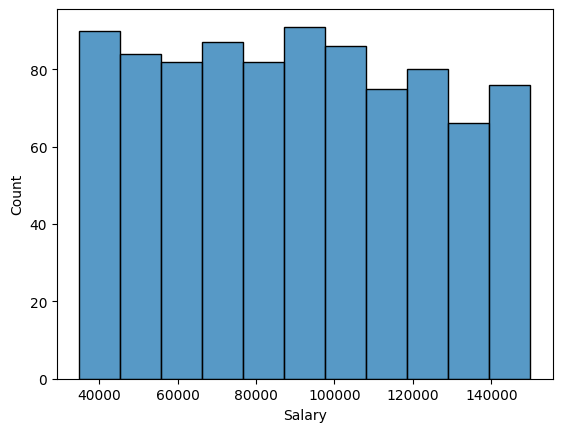

In [23]:
sns.histplot(x='Salary', data=df)

BOXPLOT CAN BE USED FOR UNI AND BIVARIATE ANALYSIS

<Axes: xlabel='Salary', ylabel='Team'>

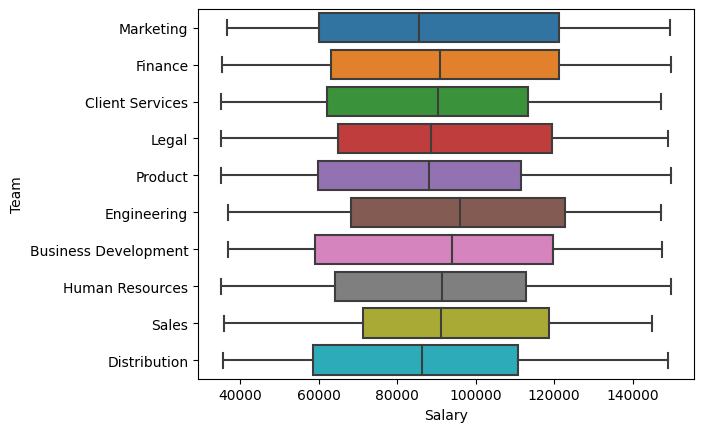

In [24]:
sns.boxplot(x='Salary', y='Team', data=df)

SCATTER CAN BE USED FOR BIVARIATE ANALYSIS ONLY

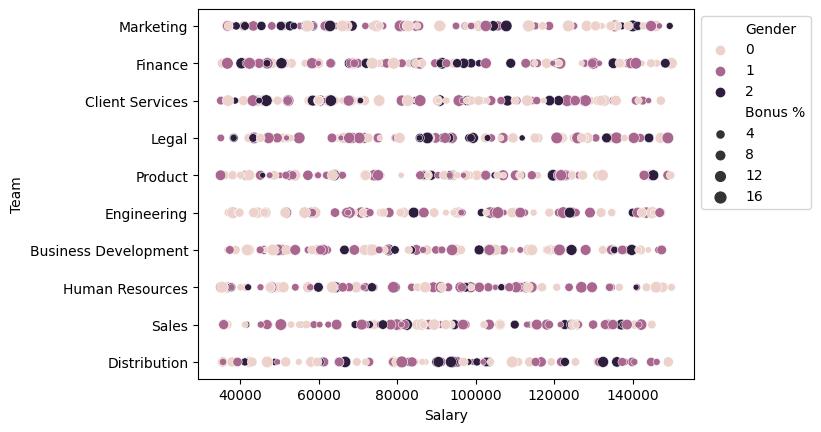

In [25]:
sns.scatterplot(x='Salary', y='Team', data=df, hue='Gender', size='Bonus %')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

PAIRPLOT CAN BE USED FOR MULTIVARIATE AND BIVARIATE ANALYSIS

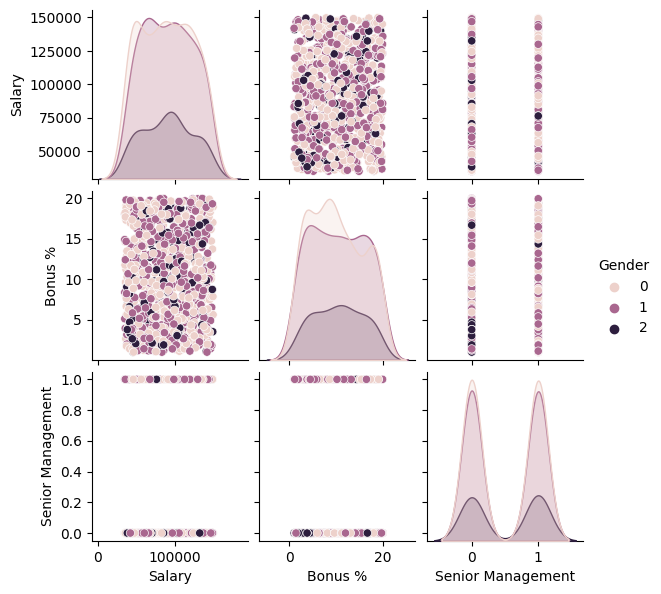

In [26]:
sns.pairplot(df, hue='Gender', height=2)

HANDLING OUTLIERS

In [40]:
from sklearn.datasets import load_iris

In [41]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [42]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: xlabel='sepal length (cm)'>

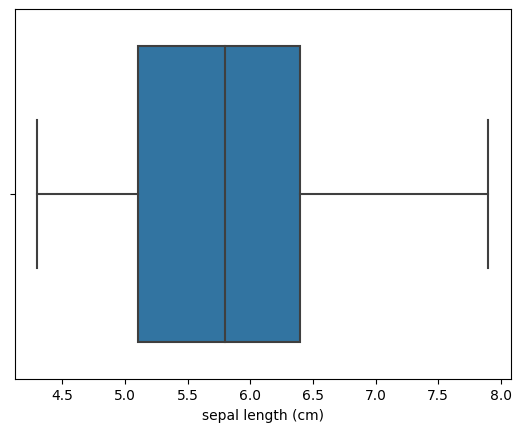

In [44]:
sns.boxplot(x='sepal length (cm)', data =df)

Removing Outliers